# Computer Vision - P1

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented. 

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 2nd, 23:00 h** 

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

Requirement: The code should be,
- optimized ( e.g. do not use 'for' instruction when indexing numpy arrays)
- readable  ( e.g. avoiding the implementation of more than 2 loops within a line)
- commented and with descriptions

### Packages loading 

First, we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [3]:
%matplotlib inline

## ----------------------------------------------------------------------------------------------------------


### 1.1 Image creation, saving and loading

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) 
- Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

Size:  (150, 200)


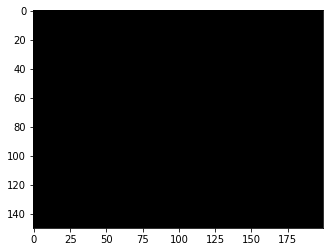

In [4]:
#1st Exercice A: Declaring a variable as a numpy object
#and calling its "zeros" function to create a full black image
# with each element as an 8 bit integer.
arr_ = np.zeros((150, 200), dtype = np.uint8)

plt.imshow(arr_, cmap = "gray")

print("Size: ", np.shape(arr_))

- How many values can have each pixel in this case? 

In [5]:
# In this case the picture has only one value of the gray scale per pixel.

**Solution:** 

This allows us to represent 2^8 = 256 values in each pixel.

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). Visualize the image and print the values of its first row. 

<img src="images_notebook/solution_11b.png">

Size:  (150, 200)


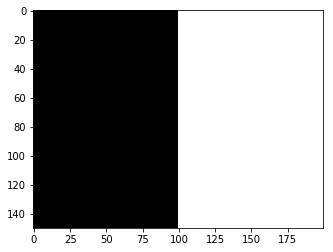

In [6]:
import math

#1st Exercice B: for i in range of the number of rows we paint halve of the rows to black and the other to white using
#the append function.
#That function lets us specify the amount of rows and columns and its pixel value.
#Later on we specify the "uint8" type to pixel's type and we show the imatge and its size.
bw_arr = []
bw_arr = np.zeros((150, 200))

bw_arr[:, math.ceil(bw_arr.shape[1]/2):] = 1
    
plt.imshow(bw_arr, cmap = "gray")
print("Size: ", np.shape(bw_arr))


c) Use the IO image package to save the image previously created:

In [7]:
# Firstly, We import the input/output from the skimage package and next We save the image with the gray scale.
from skimage import io
io.imsave('images/grayscale_img.bmp',bw_arr, cmap ='gray')


C:\Users\Fran\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


b) Load the saved image and visualize it:

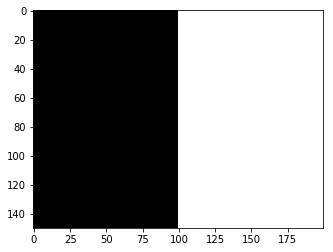

In [8]:
# Using the previously imported I/O, we use it to read the saved image. Because of the saving, when we visualize it
# the image appears as purple and yellow. To solve this, we need the "cmap" parameter stating that it's visualized in
# gray scale. 

img = io.imread('images/grayscale_img.bmp')
plt.imshow(img, cmap ='gray')
plt.show()

## ----------------------------------------------------------------------------------------------------------


### 1.2 Color image manipulation

a) 
- Load and show the image `lenna.jpg`.
- Check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

Lenna Grayscale: 


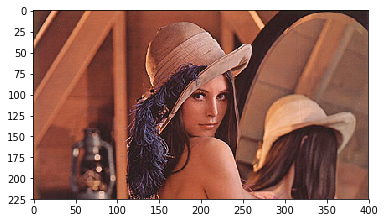

Lenna RGB: 


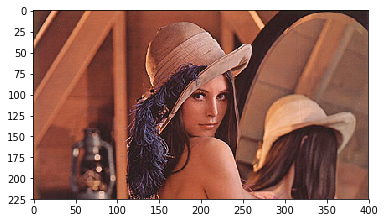

In [88]:
#First, we read the image of lenna and store it in a variable.
lenna = io.imread('images/lenna.jpg')

#By doing numpy.shape(lenna) we get the dimensions of the image.
print('Shape: ',np.shape(lenna),'\n')

#Showing the Lenna image with a cmap indicating that we want it in grayscale
print('Lenna Grayscale: ')
plt.imshow(lenna, cmap = 'gray')
plt.show()

#Showing the Lenna image with a cmap indicating that we want it in RGB, in this case we use hot_r, but another one can
#be used if it's within the RGB scale.
print('Lenna RGB: ')
plt.imshow(lenna, cmap = 'hot_r') #In RGB using the hot_r filter/map.
plt.show()

#We can see that there's no change in the picture while we state that we want it in grayscale and
#there's no change when the cmap is in RGB scale.

b) Convert the previous image to grayscale, and visualize and save it. Note that there are 2 different solutions for the conversion.

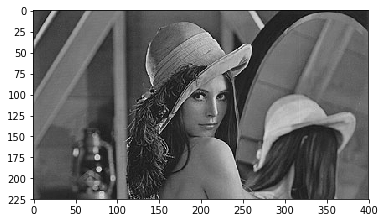

In [10]:
from skimage.color import rgb2gray
lenna_gray = rgb2gray(lenna)
plt.imshow(lenna_gray, cmap='gray')
plt.show()

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

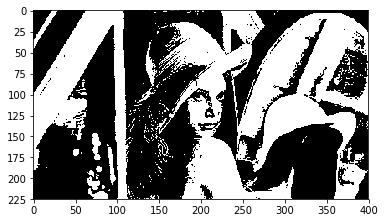

In [11]:
lenna_bin = lenna_gray.copy() #realizamos la copia mas que nada para proteccion de datos.

lenna_bin = lenna_bin*255 #esto pasa los valores de los colores a escala 255 porque estan entre 0 i 1.
lenna_bin = lenna_bin >= 100 #Entonces cuando los numeros, ahora en la escala anterior, superan o igualan a 100 se 
# vuelven true(1) mientras que los otros se vuelven false(0). De esta manera sale una imagen representada por una matriz
# booleana. Al mostrarla aparece la imagen en unicamente 0 o 255, es decir, blanco o negro, sin grises intermedios.

plt.imshow(lenna_bin, cmap='gray')
plt.show()

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

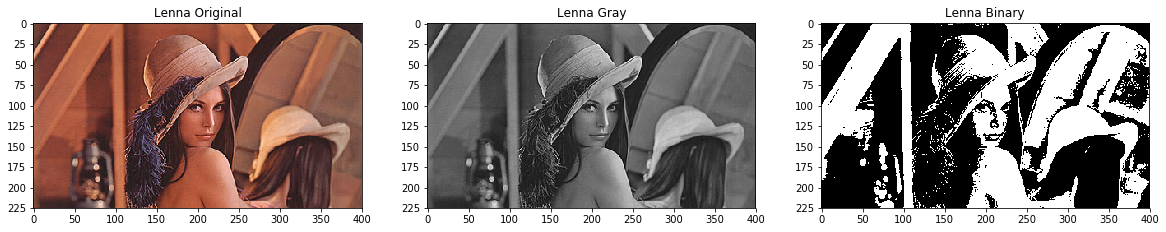

In [12]:
f,lenna_all = plt.subplots(ncols = 3,nrows = 1,figsize=(20,10))

lenna_all[0].imshow(lenna)
lenna_all[0].set_title('Lenna Original')
lenna_all[1].imshow(lenna_gray,cmap='gray')
lenna_all[1].set_title('Lenna Gray')
lenna_all[2].imshow(lenna_bin,cmap='gray')
lenna_all[2].set_title('Lenna Binary')
plt.show()

## ----------------------------------------------------------------------------------------------------------


### 1.3 Images manipulation

a) Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. 

(We recommend to create a bigger black image to later embed the original image in the central part)

<img src="images_notebook/lena_frame.png">

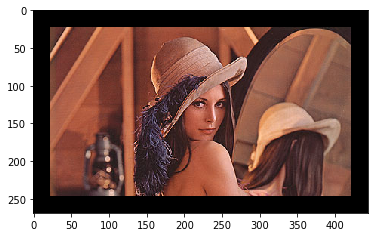

In [13]:
height, width, channel = lenna.shape #We assign the tuple given as lenna.shape to three variables
frame = height//10#The variable frame will contain the size from the lenna's margin to black image margin
lenna_margin = np.zeros(((height + 2*frame), (width + 2*frame), channel), dtype = np.uint8) # using the zeros function we create a 3 channel matrix sized with lenna's dimentions plus 2 times the frame for it to be at all sides
lenna_margin[frame:height + frame , frame: width + frame] = lenna #slicing allow us to choose a specific ampount of pixels to later on change them for a whole picture 
plt.imshow(lenna_margin, cmap = "gray")#Just showing the result
plt.show()

b) 
- Change the mask of the framed image to red. 
- Visualize the three images with their respective titles.

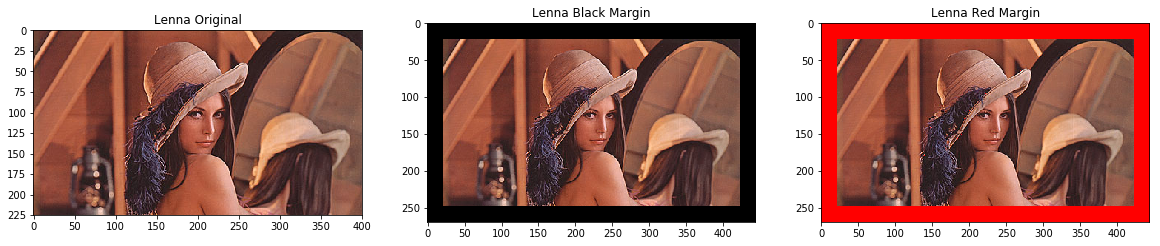

In [14]:
lenna_red = lenna_margin + np.array([255,0,0], dtype = "uint8")


f,lenna_all = plt.subplots(ncols = 3,nrows = 1,figsize=(20,10))

lenna_all[0].imshow(lenna)
lenna_all[0].set_title('Lenna Original')
lenna_all[1].imshow(lenna_margin,cmap='gray')
lenna_all[1].set_title('Lenna Black Margin')
lenna_all[2].imshow(lenna_red,cmap='gray')
lenna_all[2].set_title('Lenna Red Margin')
plt.show()

## ----------------------------------------------------------------------------------------------------------

### 1.4 Masks and logical image manipulation

- Import/read the image `circles.bmp` (see figure top) 

- Define 3 images in such a way that each one contains only 1 ball (see figure bottom). Balls should be extracted by defining their grey value range.

- Visualize the 3 images in the same figure (e.g. plt.subplots(ncols=3, figsize=(10,20))). Add titles to the figures

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

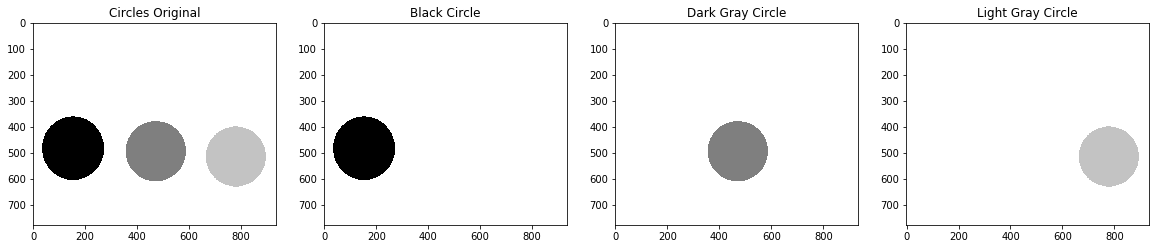

In [15]:
from skimage import img_as_ubyte

circles = io.imread('images/circles.bmp')

circles_copy = circles.copy()
circles_A = circles.copy()
circles_B = circles.copy()
circles_C = circles.copy()

circles_min = np.min(circles)
circles_A = circles*255

#primer circulo

circles_A[circles_A != circles_min] = 255
circles_copy[circles_copy == circles_A] = 255

#Segundo circulo
circles_min = np.min(circles_copy)

circles_B[circles_copy != circles_min] = 255
circles_copy[circles_copy == circles_B] = 255

#Tercer circulo
circles_min = np.min(circles_copy)

circles_C[circles_copy != circles_min] = 255

f,circle_all = plt.subplots(ncols = 4,nrows = 1,figsize=(20,10))

circle_all[0].imshow(circles)
circle_all[0].set_title('Circles Original')
circle_all[1].imshow(circles_A, vmin=0,vmax=255)
circle_all[1].set_title('Black Circle')
circle_all[2].imshow(circles_B, vmin=0,vmax=255)
circle_all[2].set_title('Dark Gray Circle')
circle_all[3].imshow(circles_C, vmin=0,vmax=255)
circle_all[3].set_title('Light Gray Circle')

plt.show()

## ----------------------------------------------------------------------------------------------------------


### 1.5 Color manipulation

a) 

- Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

- Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

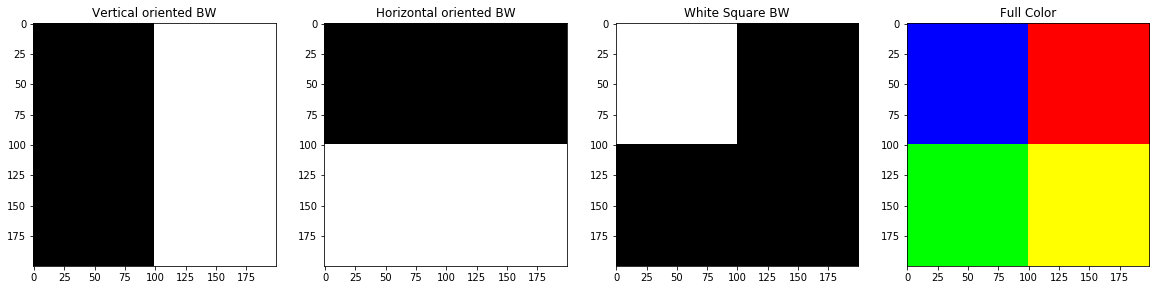

In [87]:
import math

#To start with, we create a half black half white divided matrix in vertical orientation, this matrix represents
#the red channel.

#Black and white vertical stripes.
vertical_BW = np.zeros((200, 200), dtype = np.uint8)
vertical_BW[:, math.ceil(vertical_BW.shape[1]/2):] = 1

#Secondly, now we create another half black half white divided matrix but now in horizontal orientation, this one
#represents the green channel.

#Black and white horizontal stripes.
horizontal_BW = np.zeros((200, 200), dtype = np.uint8)
horizontal_BW[math.ceil(horizontal_BW.shape[0]/2):,:] = 1

#Finally, we create an almost black matrix but with a white square in the upper left corner that occupies one quarter 
#of the image. This represents the blue channel.

#A White square and the rest is black
white_square_BW = np.zeros((200,200), dtype = np.uint8)

white_square_BW[:math.ceil(white_square_BW.shape[0]/2), :math.ceil(white_square_BW.shape[1]/2)] = 1

#In order to create the four colour matrix, we need to add to a new black matrix the other three matrix created 
#previously in the channel of the new one. The one in vertical orientation in the 0 channel, the horizontal in the
#1 channel and the third one in the 2 channel, being those matrices multiplied by 255. 
# Those channels represents the RGB of the new matrix. 

full_Color = np.zeros((200, 200, 3), dtype = np.uint8)

full_Color[:, :, 0] = vertical_BW * 255
full_Color[:, :, 1] = horizontal_BW * 255
full_Color[:, :, 2] = white_square_BW * 255

f,colours = plt.subplots(ncols = 4,nrows = 1,figsize=(20,10))

colours[0].imshow(vertical_BW, cmap='gray')
colours[0].set_title('Vertical oriented BW')
colours[1].imshow(horizontal_BW, cmap='gray')
colours[1].set_title('Horizontal oriented BW')
colours[2].imshow(white_square_BW,cmap='gray')
colours[2].set_title('White Square BW')
colours[3].imshow(full_Color, cmap ='gray')
colours[3].set_title('Full Color')

plt.show()


b) 

- Read and visualize the image `sillas.jpg` (see figure top). 
- Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">



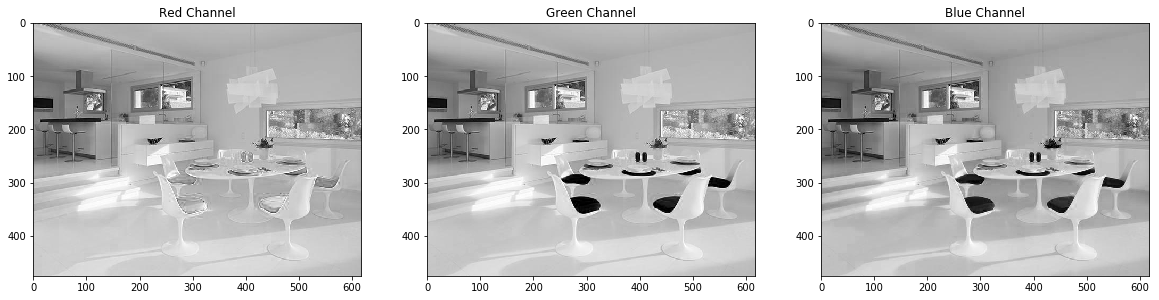

In [17]:
#Reading the chairs image.
chairs = io.imread('images/sillas.jpg')

#Creating a big frame to put inside the three images

f,all_chairs = plt.subplots(ncols = 3,nrows = 1,figsize=(20,10))

#Assigning chair's first, second, and third values of its RGB channel to three new variables

red_channel, green_channel, blue_channel = chairs[:,:,0], chairs[:,:,1], chairs[:,:,2]

#Assigning the three images to frame's positions and setting its titles
all_chairs[0].imshow(red_channel, cmap = "gray")
all_chairs[0].set_title("Red Channel")
all_chairs[1].imshow(green_channel, cmap = "gray")
all_chairs[1].set_title("Green Channel")
all_chairs[2].imshow(blue_channel, cmap = "gray")
all_chairs[2].set_title("Blue Channel")

plt.show()

- Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/ex17c3.png">

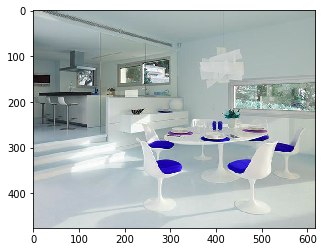

In [65]:
#To begin with, we make a copy of the original image of chairs where we are gonna
#turn the red chairs into blue ones.

blue_chairs = chairs.copy()

#Following up, we turn the copy blue channel to the original red channel and the
#blue one into the red of the original.

blue_chairs[:,:,2] = chairs[:,:,0]
blue_chairs[:,:,0] = chairs[:,:,2]

#Finally, we show the new picture with the blue chairs.

plt.imshow(blue_chairs)
plt.show()

c) 

- Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). 

- Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

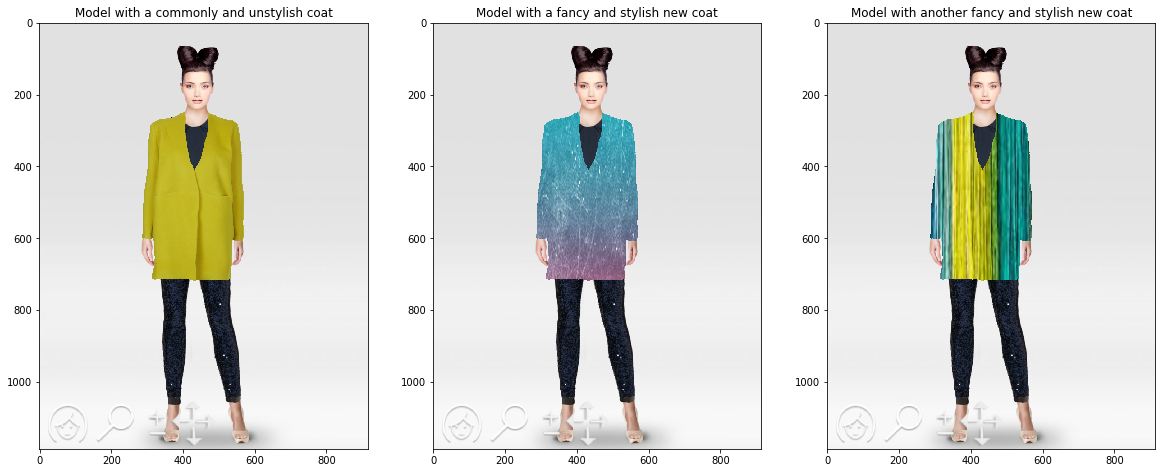

In [84]:
from skimage.color import rgba2rgb
from skimage.transform import resize

coat_img = io.imread('images/coat.png')
model_img = io.imread('images/model.png')

coat_img = rgba2rgb(coat_img)
model_img = rgba2rgb(model_img)

model_2 = model_img.copy()
model_3 = model_img.copy()
own_texture = io.imread('images/tizadecolores.jpg')
second_texture = io.imread('images/textura2.jpg')

own_texture = resize(own_texture,(1188,915), mode='reflect')
second_texture = resize(second_texture,(1188,915), mode='reflect')

coat = coat_img>[0,0,0]

#The model is wearing the coat with its original texture.
model_img[coat] = coat_img[coat]

#The model is wearing the coat with an alternative texture.
model_2[coat] = own_texture[coat]

#The model is wearing the coat with a second alternative texture.
model_3[coat] = second_texture[coat]

f,models = plt.subplots(ncols = 3,nrows = 1,figsize=(20,10))

models[0].imshow(model_img, cmap='gray')
models[0].set_title('Model with a commonly and unstylish coat')
models[1].imshow(model_2, cmap ='gray')
models[1].set_title('Model with a fancy and stylish new coat')
models[2].imshow(model_3,cmap='gray')
models[2].set_title('Model with another fancy and stylish new coat')

plt.show()